In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from matplotlib.font_manager import FontProperties
from datetime import timedelta
import matplotlib.dates as mdates
from datetime import timedelta
from matplotlib.ticker import MaxNLocator  # 添加 MaxNLocator 导入




# 设置中文字体
font = FontProperties(fname=r"C:\Windows\Fonts\simhei.ttf", size=12)  # 请根据你的字体路径修改


df = pd.read_csv('raw.csv', encoding='GBK')
font = {'family' : 'SimHei',
        'weight' : 'normal',
       'size'   : 14}
df

,dtEventTime,gametype,winCamp,gametime,killcnt,deadcnt,assistcnt,gameresult,mvpcnt,losemvp,...,bgImg,userId,stickyEvaluateUrl,runawayUrl,hero1Kill6Cnt,hero1Kill7Cnt,hero1Kill8Cnt,hero1Kill9Cnt,hero1Kill10Cnt,gradeGame
0,1739257867,4,2,2025/2/11 14:58,6,10,8,1,0,0,...,NaN,0,NaN,NaN,0,0,0,0,0,7.3
1,1739207871,4,1,2025/2/11 1:07,3,11,4,1,0,0,...,NaN,0,NaN,NaN,0,0,0,0,0,6.5
2,1739207009,4,2,2025/2/11 0:45,3,10,5,1,0,0,...,NaN,0,NaN,NaN,0,0,0,0,0,6.4
3,1739195675,4,2,2025/2/10 21:42,7,9,6,1,0,0,...,NaN,0,NaN,NaN,0,0,0,0,0,8.9
4,1739194626,4,2,2025/2/10 21:16,5,15,10,1,0,0,...,NaN,0,NaN,NaN,0,0,0,0,0,6.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185,1736160864,4,2,2025/1/6 18:34,7,17,8,1,0,0,...,NaN,0,NaN,NaN,0,0,0,0,0,7.7
186,1736159445,4,2,2025/1/6 18:19,3,10,5,1,0,0,...,NaN,0,NaN,NaN,0,0,0,0,0,5.7
187,1736158574,4,1,2025/1/6 18:05,1,7,7,1,0,0,...,NaN,0,NaN,NaN,0,0,0,0,0,5.2
188,1736082765,4,2,2025/1/5 20:59,4,12,0,2,0,1,...,NaN,0,NaN,NaN,0,0,0,0,0,6.8


In [40]:
total_games = len(df)
print(f"总对局场数: {total_games}")

总对局场数: 190


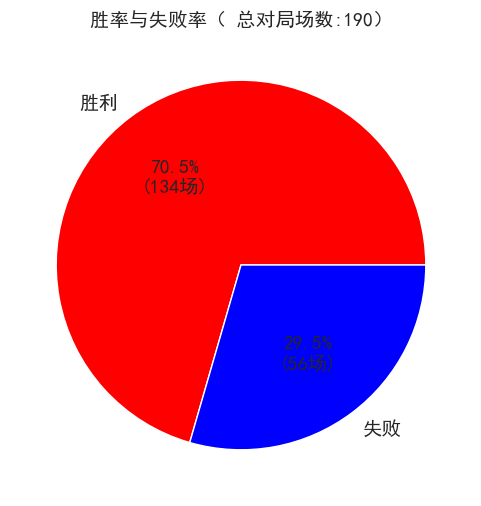

In [41]:
win_count = len(df[df['gameresult'] == 1])
lose_count = len(df[df['gameresult'] == 2])

# 自定义格式化函数，显示百分比和场次数
def autopct_format(values):
    def my_format(pct):
        total = sum(values)
        val = int(round(pct * total / 100.0))
        return f'{pct:.1f}%\n({val}场)'
    return my_format

plt.figure(figsize=(6, 6))
plt.pie(
    [win_count, lose_count],
    labels=['胜利', '失败'],
    autopct=autopct_format([win_count, lose_count]),  # 使用自定义格式化函数
    colors=['red', 'blue'],
    textprops={'fontproperties': font}  # 设置文本字体
)
plt.title(f'胜率与失败率（ 总对局场数:{total_games}）', fontproperties=font)
plt.show()

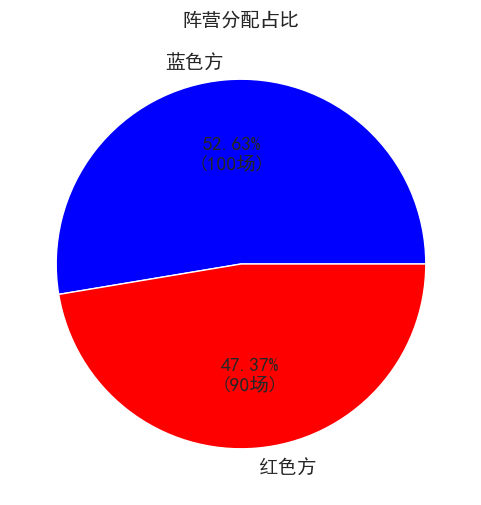

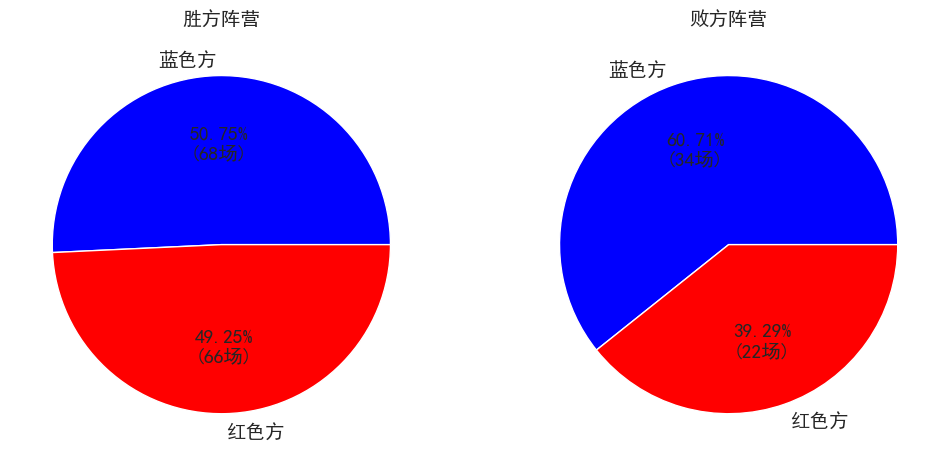

In [42]:
# 计算阵营分配占比
acnt_camp_distribution = df['AcntCamp'].value_counts()

# 自定义格式化函数，显示百分比和场次数
def autopct_format(values):
    def my_format(pct):
        total = sum(values)
        val = int(round(pct * total / 100.0))
        return f'{pct:.2f}%\n({val}场)'
    return my_format

# 绘制阵营分配占比饼图
plt.figure(figsize=(6, 6))
plt.pie(
    acnt_camp_distribution,
    labels=['蓝色方', '红色方'],  # 1代表蓝色方，2代表红色方
    autopct=autopct_format(acnt_camp_distribution),  # 使用自定义格式化函数
    colors=['blue', 'red'],
    textprops={'fontproperties': font}  # 设置文本字体
)
plt.title('阵营分配占比', fontproperties=font)
plt.show()

# 计算胜方和败方的阵营分布
win_camp = df[df['gameresult'] == 1]['winCamp'].value_counts()
lose_camp = df[df['gameresult'] == 2]['winCamp'].value_counts()

# 绘制胜方和败方的阵营分布饼图
plt.figure(figsize=(12, 6))

# 胜方阵营
plt.subplot(1, 2, 1)
plt.pie(
    win_camp,
    labels=['蓝色方', '红色方'],  # 1代表蓝色方，2代表红色方
    autopct=autopct_format(win_camp),  # 使用自定义格式化函数
    colors=['blue', 'red'],
    textprops={'fontproperties': font}  # 设置文本字体
)
plt.title('胜方阵营', fontproperties=font)

# 败方阵营
plt.subplot(1, 2, 2)
plt.pie(
    lose_camp,
    labels=['蓝色方', '红色方'],  # 1代表蓝色方，2代表红色方
    autopct=autopct_format(lose_camp),  # 使用自定义格式化函数
    colors=['blue', 'red'],
    textprops={'fontproperties': font}  # 设置文本字体
)
plt.title('败方阵营', fontproperties=font)

plt.show()

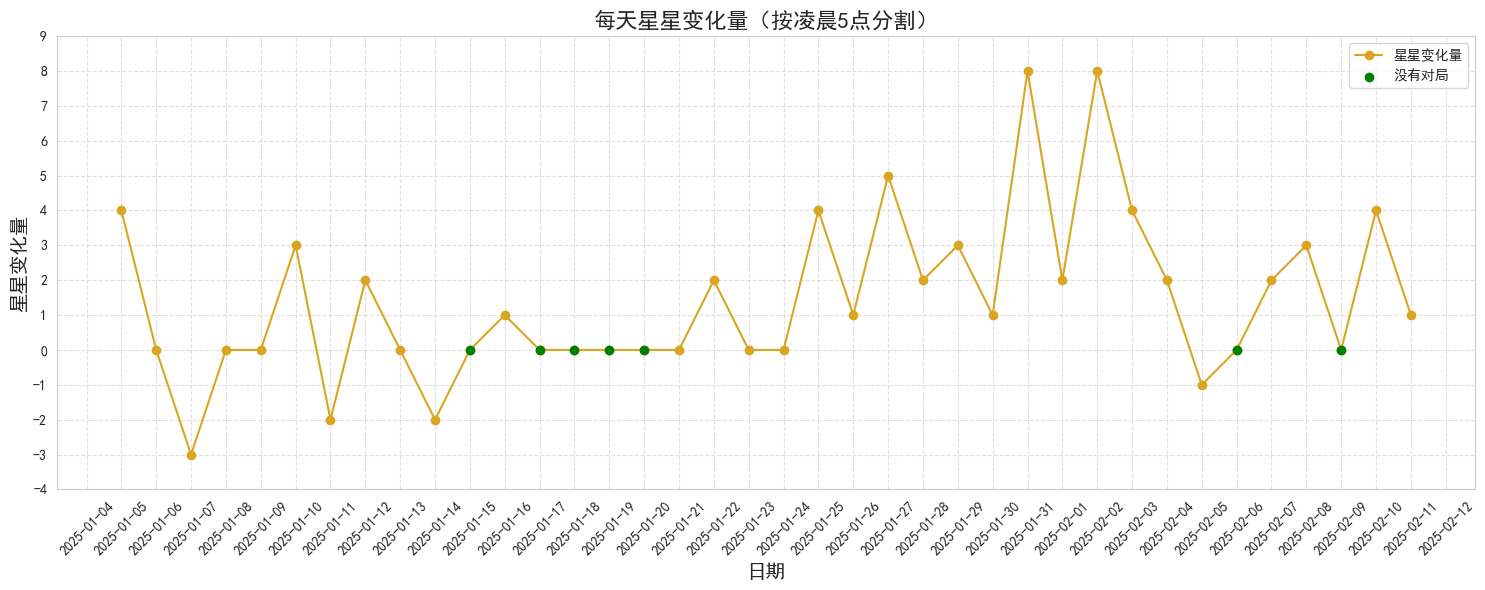

In [43]:
plt.rcParams['font.sans-serif'] = ['SimHei']  # Use a font that supports CJK characters
plt.rcParams['axes.unicode_minus'] = False  # Ensure that minus signs are displayed correctly

# 按凌晨5点分割日期
df['datetime'] = pd.to_datetime(df['gametime'])
# 修正日期分割逻辑：移除多余的+1天
df['date'] = df['datetime'].apply(
    lambda x: (x if x.hour >= 5 else x - timedelta(days=1)).date()
)

# 按日期分组，获取每天的星星数（保持原始顺序）
daily_stars = df.sort_values('datetime').groupby('date')['stars'].last().reset_index()
daily_stars['date'] = pd.to_datetime(daily_stars['date'])

# 生成完整日期范围（基于修正后的日期）
start_date = daily_stars['date'].min()
end_date = daily_stars['date'].max()
full_date_range = pd.date_range(start=start_date, end=end_date, freq='D')

# 创建完整日期的 DataFrame，并填充星星数
daily_stars_full = pd.DataFrame({'date': full_date_range})
daily_stars_full = daily_stars_full.merge(daily_stars, on='date', how='left')

# 标记没有对局的日期（在填充之前）
daily_stars_full['no_data'] = daily_stars_full['stars'].isna()

# 填充缺失的星星数为前一天的星星数（确保初始值正确）
if len(daily_stars_full) > 0:
    if pd.isna(daily_stars_full['stars'].iloc[0]):
        # 查找第一个有效值填充初始值
        first_valid_idx = daily_stars_full['stars'].first_valid_index()
        if first_valid_idx is not None:
            daily_stars_full['stars'].iloc[0] = daily_stars_full['stars'].iloc[first_valid_idx]
        else:
            daily_stars_full['stars'] = 0  # 如果全部为空则设为0

daily_stars_full['stars'] = daily_stars_full['stars'].ffill().fillna(0)

# 计算每天星星数的变化量（修正逻辑）
daily_stars_full['star_change'] = daily_stars_full['stars'].diff().fillna(daily_stars_full['stars'].iloc[0])

# 绘制星星数变化量图
plt.figure(figsize=(15, 6))
plt.plot(daily_stars_full['date'], daily_stars_full['star_change'], marker='o', color='#DAA520', label='星星变化量')

# 标记没有对局的日期为绿色坐标点（变化量为 0）
no_data_dates = daily_stars_full[daily_stars_full['no_data']]['date']
if not no_data_dates.empty:
    plt.scatter(no_data_dates, [0] * len(no_data_dates), color='green', zorder=5, label='没有对局')

# 设置标题和标签
plt.title('每天星星变化量（按凌晨5点分割）', fontsize=16)
plt.xlabel('日期', fontsize=14)
plt.ylabel('星星变化量', fontsize=14)

# 设置 Y 轴范围，增加刻度密度
star_change_min = int(min(daily_stars_full['star_change']) - 1)
star_change_max = int(max(daily_stars_full['star_change']) + 1)
plt.ylim(star_change_min, star_change_max)
plt.yticks(range(star_change_min, star_change_max + 1, 1))

# 设置 X 轴日期格式和旋转
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator())
plt.xticks(rotation=45)

# 添加虚线网格
plt.grid(True, linestyle='--', alpha=0.6)

# 显示图例
plt.legend()

# 显示图表
plt.tight_layout()
plt.show()

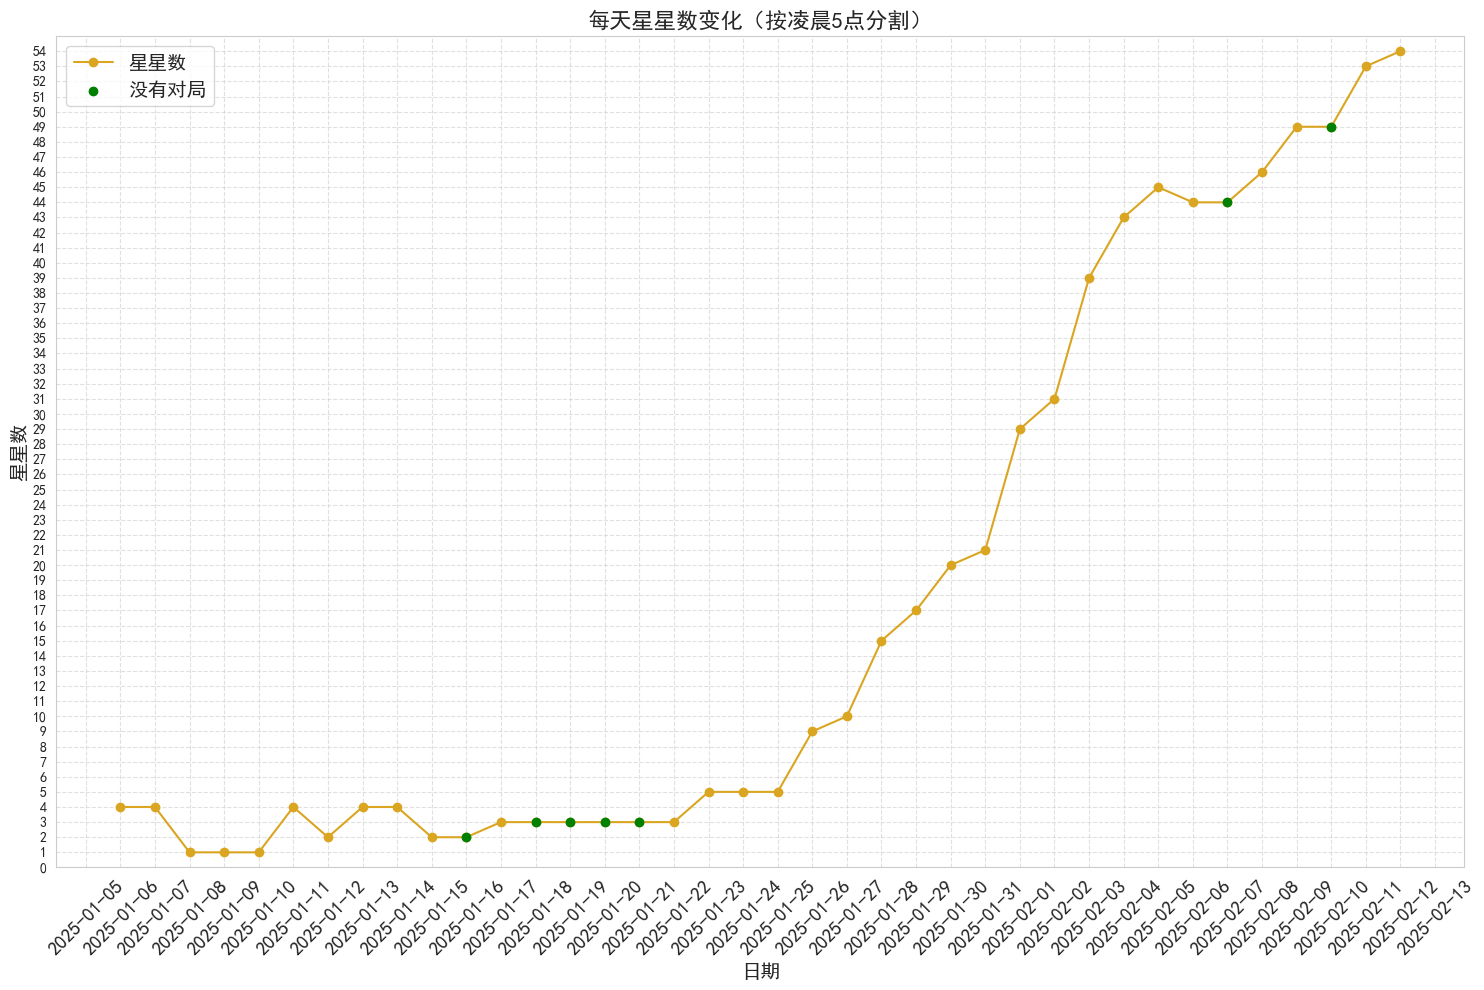

In [44]:
# 处理日期分割（核心修正点保持不变）
df['datetime'] = pd.to_datetime(df['gametime'])
df['datetime_shifted'] = df['datetime'] - pd.Timedelta(hours=5)  # 平移5小时
df['date'] = df['datetime_shifted'].dt.date  # 直接取日期

# 按日期分组，获取每天的星星数（确保数据已排序）
df = df.sort_values('datetime')
daily_stars = df.groupby('date')['stars'].last().reset_index()

# 生成完整日期范围（关键修正点：日期加1天）
start_date = daily_stars['date'].min()
end_date = daily_stars['date'].max()
full_date_range = pd.date_range(
    start=start_date + pd.Timedelta(days=1),
    end=end_date + pd.Timedelta(days=1),
    freq='D'
)

# 创建完整日期的 DataFrame，并填充星星数
daily_stars_full = pd.DataFrame({'date': full_date_range})

# 合并数据前，将 daily_stars 的 'date' 列转换为平移后的日期加1天
daily_stars['date'] = pd.to_datetime(daily_stars['date']) + pd.Timedelta(days=1)

# 合并数据
daily_stars_full = daily_stars_full.merge(daily_stars, on='date', how='left')


# 标记没有对局的日期（在填充之前）
daily_stars_full['no_data'] = daily_stars_full['stars'].isna()

# 填充缺失的星星数为前一天的星星数
daily_stars_full['stars'] = daily_stars_full['stars'].ffill()

# 绘制星星数变化图
plt.figure(figsize=(15, 10))
plt.plot(daily_stars_full['date'], daily_stars_full['stars'], marker='o', color='#DAA520', label='星星数')

# 标记没有对局的日期为绿色坐标点（填充后的星星数是前一天的星星数）
no_data_dates = daily_stars_full[daily_stars_full['no_data']]['date']
no_data_stars = daily_stars_full[daily_stars_full['no_data']]['stars']
plt.scatter(no_data_dates, no_data_stars, color='green', zorder=5, label='没有对局')

# 设置标题和标签
plt.title('每天星星数变化（按凌晨5点分割）', fontproperties=font, fontsize=16)
plt.xlabel('日期', fontproperties=font, fontsize=14)
plt.ylabel('星星数', fontproperties=font, fontsize=14)

# 设置 Y 轴范围，从 0 开始，每次递增 1
plt.ylim(0, max(daily_stars_full['stars']) + 1)  # Y 轴从 0 开始
plt.yticks(range(0, int(max(daily_stars_full['stars']) + 1), 1))  # 每次递增 1

# 设置 X 轴日期格式和旋转
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator())
plt.xticks(rotation=45, fontproperties=font)

# 添加虚线网格
plt.grid(True, linestyle='--', alpha=0.6)

# 显示图例
plt.legend(prop=font)

# 显示图表
plt.tight_layout()
plt.show()

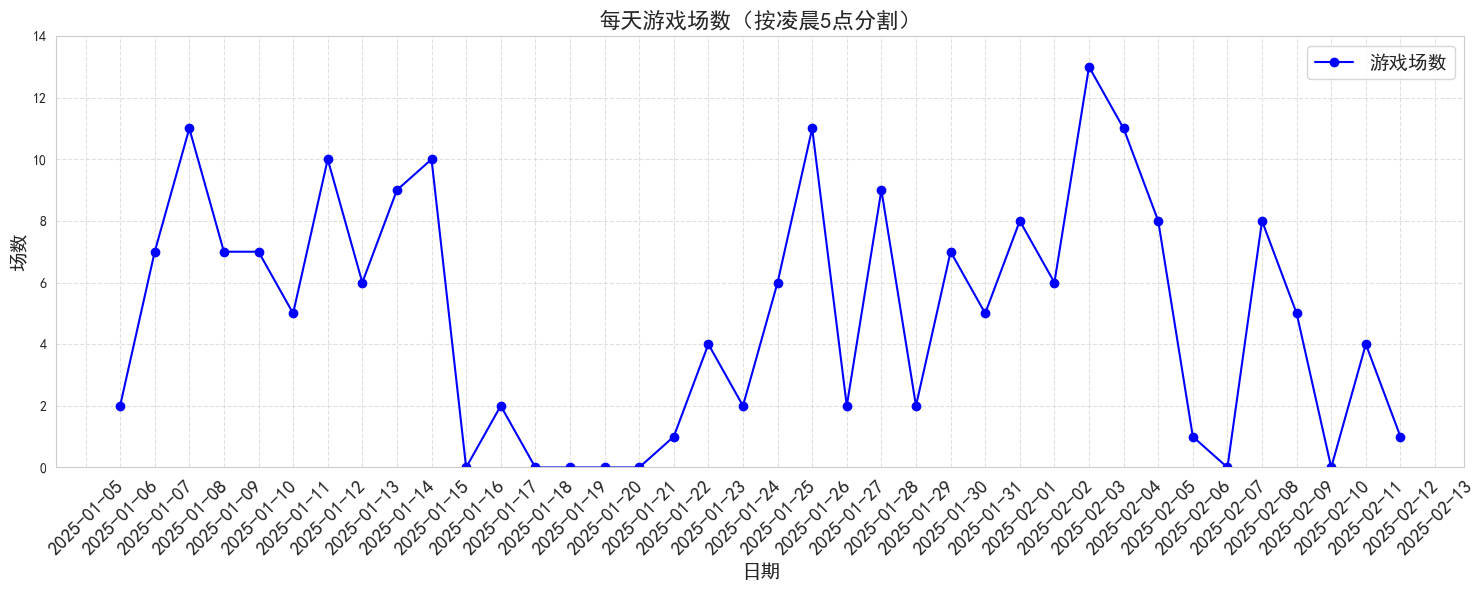

In [45]:
# 按凌晨5点分割日期
df['datetime'] = pd.to_datetime(df['gametime'])
df['date'] = df['datetime'].apply(lambda x: (x if x.hour >= 5 else x - timedelta(days=1)).date() + timedelta(days=1))

# 按每天凌晨5点分割日期
df['date'] = df['datetime'].apply(lambda x: x.date() if x.hour >= 5 else (x - pd.Timedelta(days=1)).date())
df['date'] = df['date'].apply(lambda d: d + timedelta(days=1))  # 将日期右移一天


# 按日期分组，计算每天的游戏场数
daily_games = df.groupby('date').size()

# 生成完整的日期范围
full_date_range = pd.date_range(start=daily_games.index.min(), end=daily_games.index.max(), freq='D')

# 填充缺失的日期的场数为0
daily_games = daily_games.reindex(full_date_range, fill_value=0)

# 确保日期是排序的
daily_games = daily_games.sort_index()

# 将日期转换为 matplotlib 可识别的格式
daily_games.index = pd.to_datetime(daily_games.index)

# 绘制折线图
plt.figure(figsize=(15, 6))  # 扩大图片宽度
plt.plot(daily_games.index, daily_games.values, marker='o', color='b', label='游戏场数')

# 设置标题和标签
plt.title('每天游戏场数（按凌晨5点分割）', fontproperties=font, fontsize=16)
plt.xlabel('日期', fontproperties=font, fontsize=14)
plt.ylabel('场数', fontproperties=font, fontsize=14)

# 设置X轴刻度
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))  # 格式化日期
plt.gca().xaxis.set_major_locator(mdates.DayLocator())  # 每天一个刻度
plt.xticks(rotation=45, fontproperties=font)  # 倾斜日期标签

# 设置Y轴从0开始
plt.ylim(0, max(daily_games.values) + 1)  # Y轴从0开始，最大值加1

# 添加虚线网格
plt.grid(True, linestyle='--', alpha=0.6)  # 透明度较低的虚线网格

# 显示图例
plt.legend(prop=font)

# 显示图表
plt.tight_layout()  # 自动调整布局，防止标题和标签重叠
plt.show()

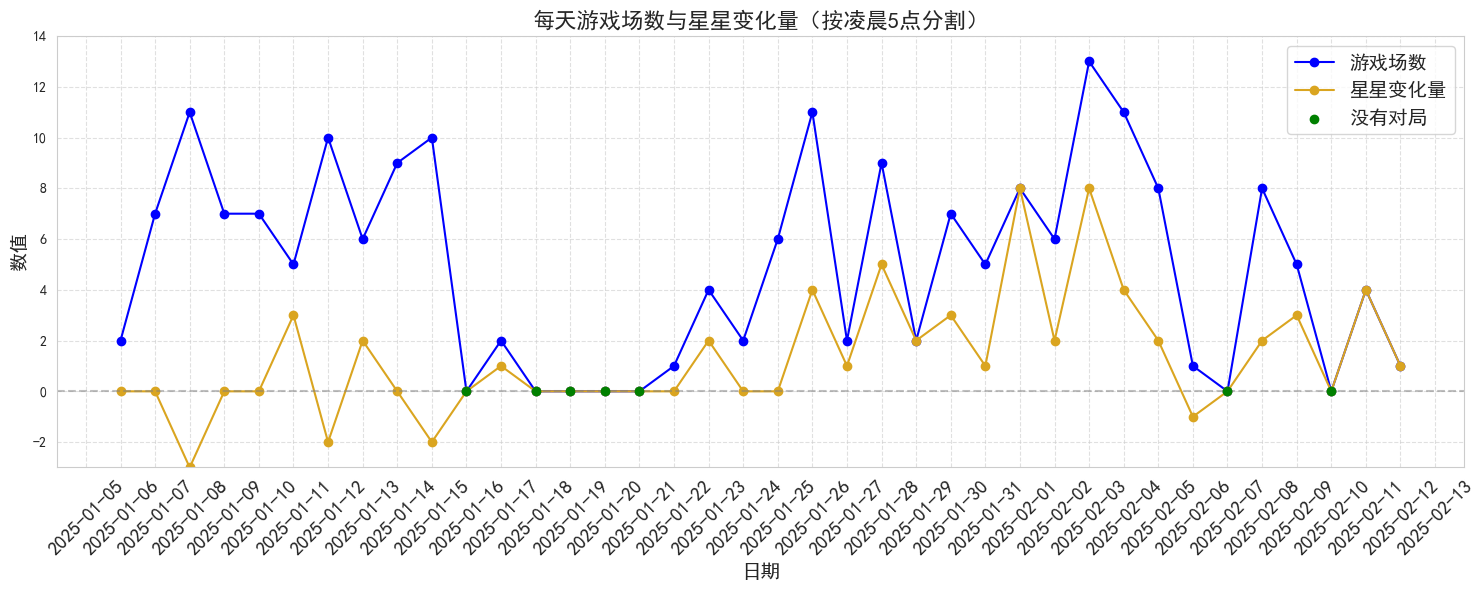

In [46]:
# 按凌晨5点分割日期
df['datetime'] = pd.to_datetime(df['gametime'])
df['date'] = df['datetime'].apply(lambda x: (x if x.hour >= 5 else x - timedelta(days=1)).date() + timedelta(days=1))

# 按日期分组，计算每天的游戏场数
daily_games = df.groupby('date').size()

# 生成完整的日期范围
full_date_range = pd.date_range(start=daily_games.index.min(), end=daily_games.index.max(), freq='D')

# 填充缺失的日期的场数为0
daily_games = daily_games.reindex(full_date_range, fill_value=0)

# 确保日期是排序的
daily_games = daily_games.sort_index()

# 将日期转换为 matplotlib 可识别的格式
daily_games.index = pd.to_datetime(daily_games.index)

# 按日期分组，获取每天的星星数
daily_stars = df.groupby('date')['stars'].last().reset_index()

# 将 daily_stars['date'] 转换为 datetime64[ns] 类型
daily_stars['date'] = pd.to_datetime(daily_stars['date'])

# 创建完整日期的 DataFrame，并填充星星数
daily_stars_full = pd.DataFrame({'date': full_date_range})
daily_stars_full = daily_stars_full.merge(daily_stars, on='date', how='left')

# 标记没有对局的日期（在填充之前）
daily_stars_full['no_data'] = daily_stars_full['stars'].isna()

# 填充缺失的星星数为前一天的星星数
daily_stars_full['stars'] = daily_stars_full['stars'].ffill()

# 计算每天星星数的变化量
daily_stars_full['star_change'] = daily_stars_full['stars'].diff().fillna(0)  # 第一天变化量为 0

# 绘制折线图
plt.figure(figsize=(15, 6))  # 扩大图片宽度

# 绘制游戏场数
plt.plot(daily_games.index, daily_games.values, marker='o', color='b', label='游戏场数')

# 绘制星星变化量
plt.plot(daily_stars_full['date'], daily_stars_full['star_change'], marker='o', color='#DAA520', label='星星变化量')

# 标记没有对局的日期为绿色坐标点（变化量为 0）
no_data_dates = daily_stars_full[daily_stars_full['no_data']]['date']
plt.scatter(no_data_dates, [0] * len(no_data_dates), color='green', zorder=5, label='没有对局')

# 设置标题和标签
plt.title('每天游戏场数与星星变化量（按凌晨5点分割）', fontproperties=font, fontsize=16)
plt.xlabel('日期', fontproperties=font, fontsize=14)
plt.ylabel('数值', fontproperties=font, fontsize=14)

# 设置X轴刻度
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))  # 格式化日期
plt.gca().xaxis.set_major_locator(mdates.DayLocator())  # 每天一个刻度
plt.xticks(rotation=45, fontproperties=font)  # 倾斜日期标签

y_min = min(daily_stars_full['star_change'].min(), 0)  # 确保 Y 轴可以显示负值
y_max = max(max(daily_games.values), max(daily_stars_full['star_change'])) + 1
plt.ylim(y_min, y_max)

plt.axhline(0, color='gray', linestyle='--', alpha=0.5)  # 添加水平参考线

# 添加虚线网格
plt.grid(True, linestyle='--', alpha=0.6)  # 透明度较低的虚线网格

# 显示图例
plt.legend(prop=font)

# 显示图表
plt.tight_layout()  # 自动调整布局，防止标题和标签重叠
plt.show()

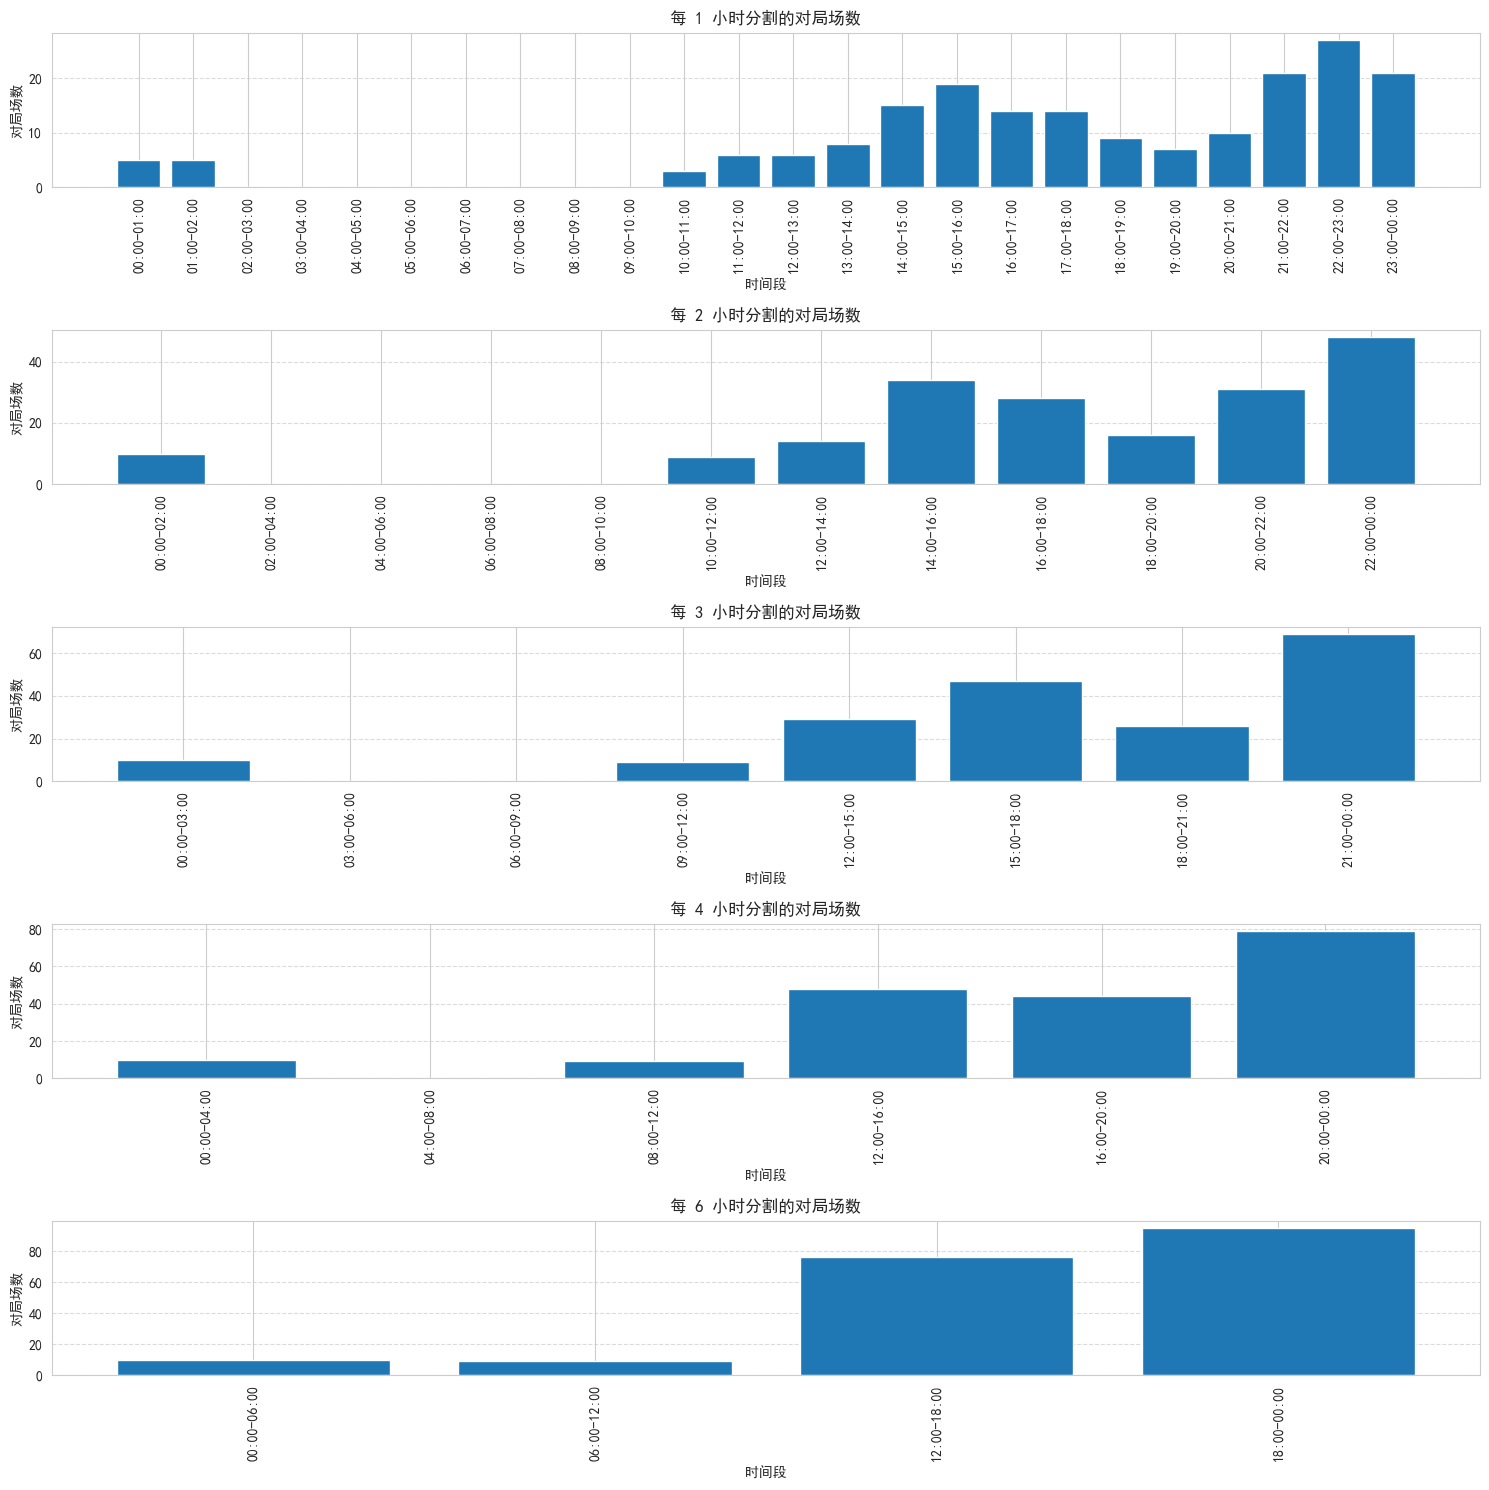

In [47]:
def split_day_into_intervals(interval_hours):
    intervals = []
    for hour in range(0, 24, interval_hours):
        start_time = datetime.strptime(f"{hour:02d}:00", "%H:%M").time()
        end_time = datetime.strptime(f"{(hour + interval_hours) % 24:02d}:00", "%H:%M").time()
        intervals.append((start_time, end_time))
    return intervals

# 统计每个时间段的对局场数（确保所有时段都有值）
def count_games_by_interval(df, interval_hours):
    intervals = split_day_into_intervals(interval_hours)
    game_counts = []
    labels = []
    for start, end in intervals:
        if start < end:
            mask = (df['gametime'].dt.time >= start) & (df['gametime'].dt.time < end)
        else:
            # 处理跨天的情况（例如 23:00-1:00）
            mask = (df['gametime'].dt.time >= start) | (df['gametime'].dt.time < end)
        count = len(df[mask])  # 统计对局场数
        game_counts.append(count)
        labels.append(f"{start.strftime('%H:%M')}-{end.strftime('%H:%M')}")
    return game_counts, labels

# 假设 df 已经存在，确保 gametime 是 datetime 类型
if 'gametime' in df.columns:
    df['gametime'] = pd.to_datetime(df['gametime'])

# 定义需要分割的时段
interval_list = [1, 2, 3, 4, 6]

# 绘制每个时段的柱状图
plt.figure(figsize=(15, 15))
for i, interval_hours in enumerate(interval_list):
    game_counts, labels = count_games_by_interval(df, interval_hours)
    plt.subplot(len(interval_list), 1, i + 1)
    x = np.arange(len(labels))  # 设置 x 轴为数值轴
    plt.bar(x, game_counts)  # 绘制柱状图
    plt.title(f"每 {interval_hours} 小时分割的对局场数")
    plt.xlabel("时间段")
    plt.ylabel("对局场数")
    plt.xticks(x, labels, rotation=90)  # 将 x 轴刻度与标签对齐，垂直显示标签
    plt.grid(axis='y', linestyle='--', alpha=0.7)  # 添加网格线
plt.tight_layout()  # 自动调整子图布局
plt.show()

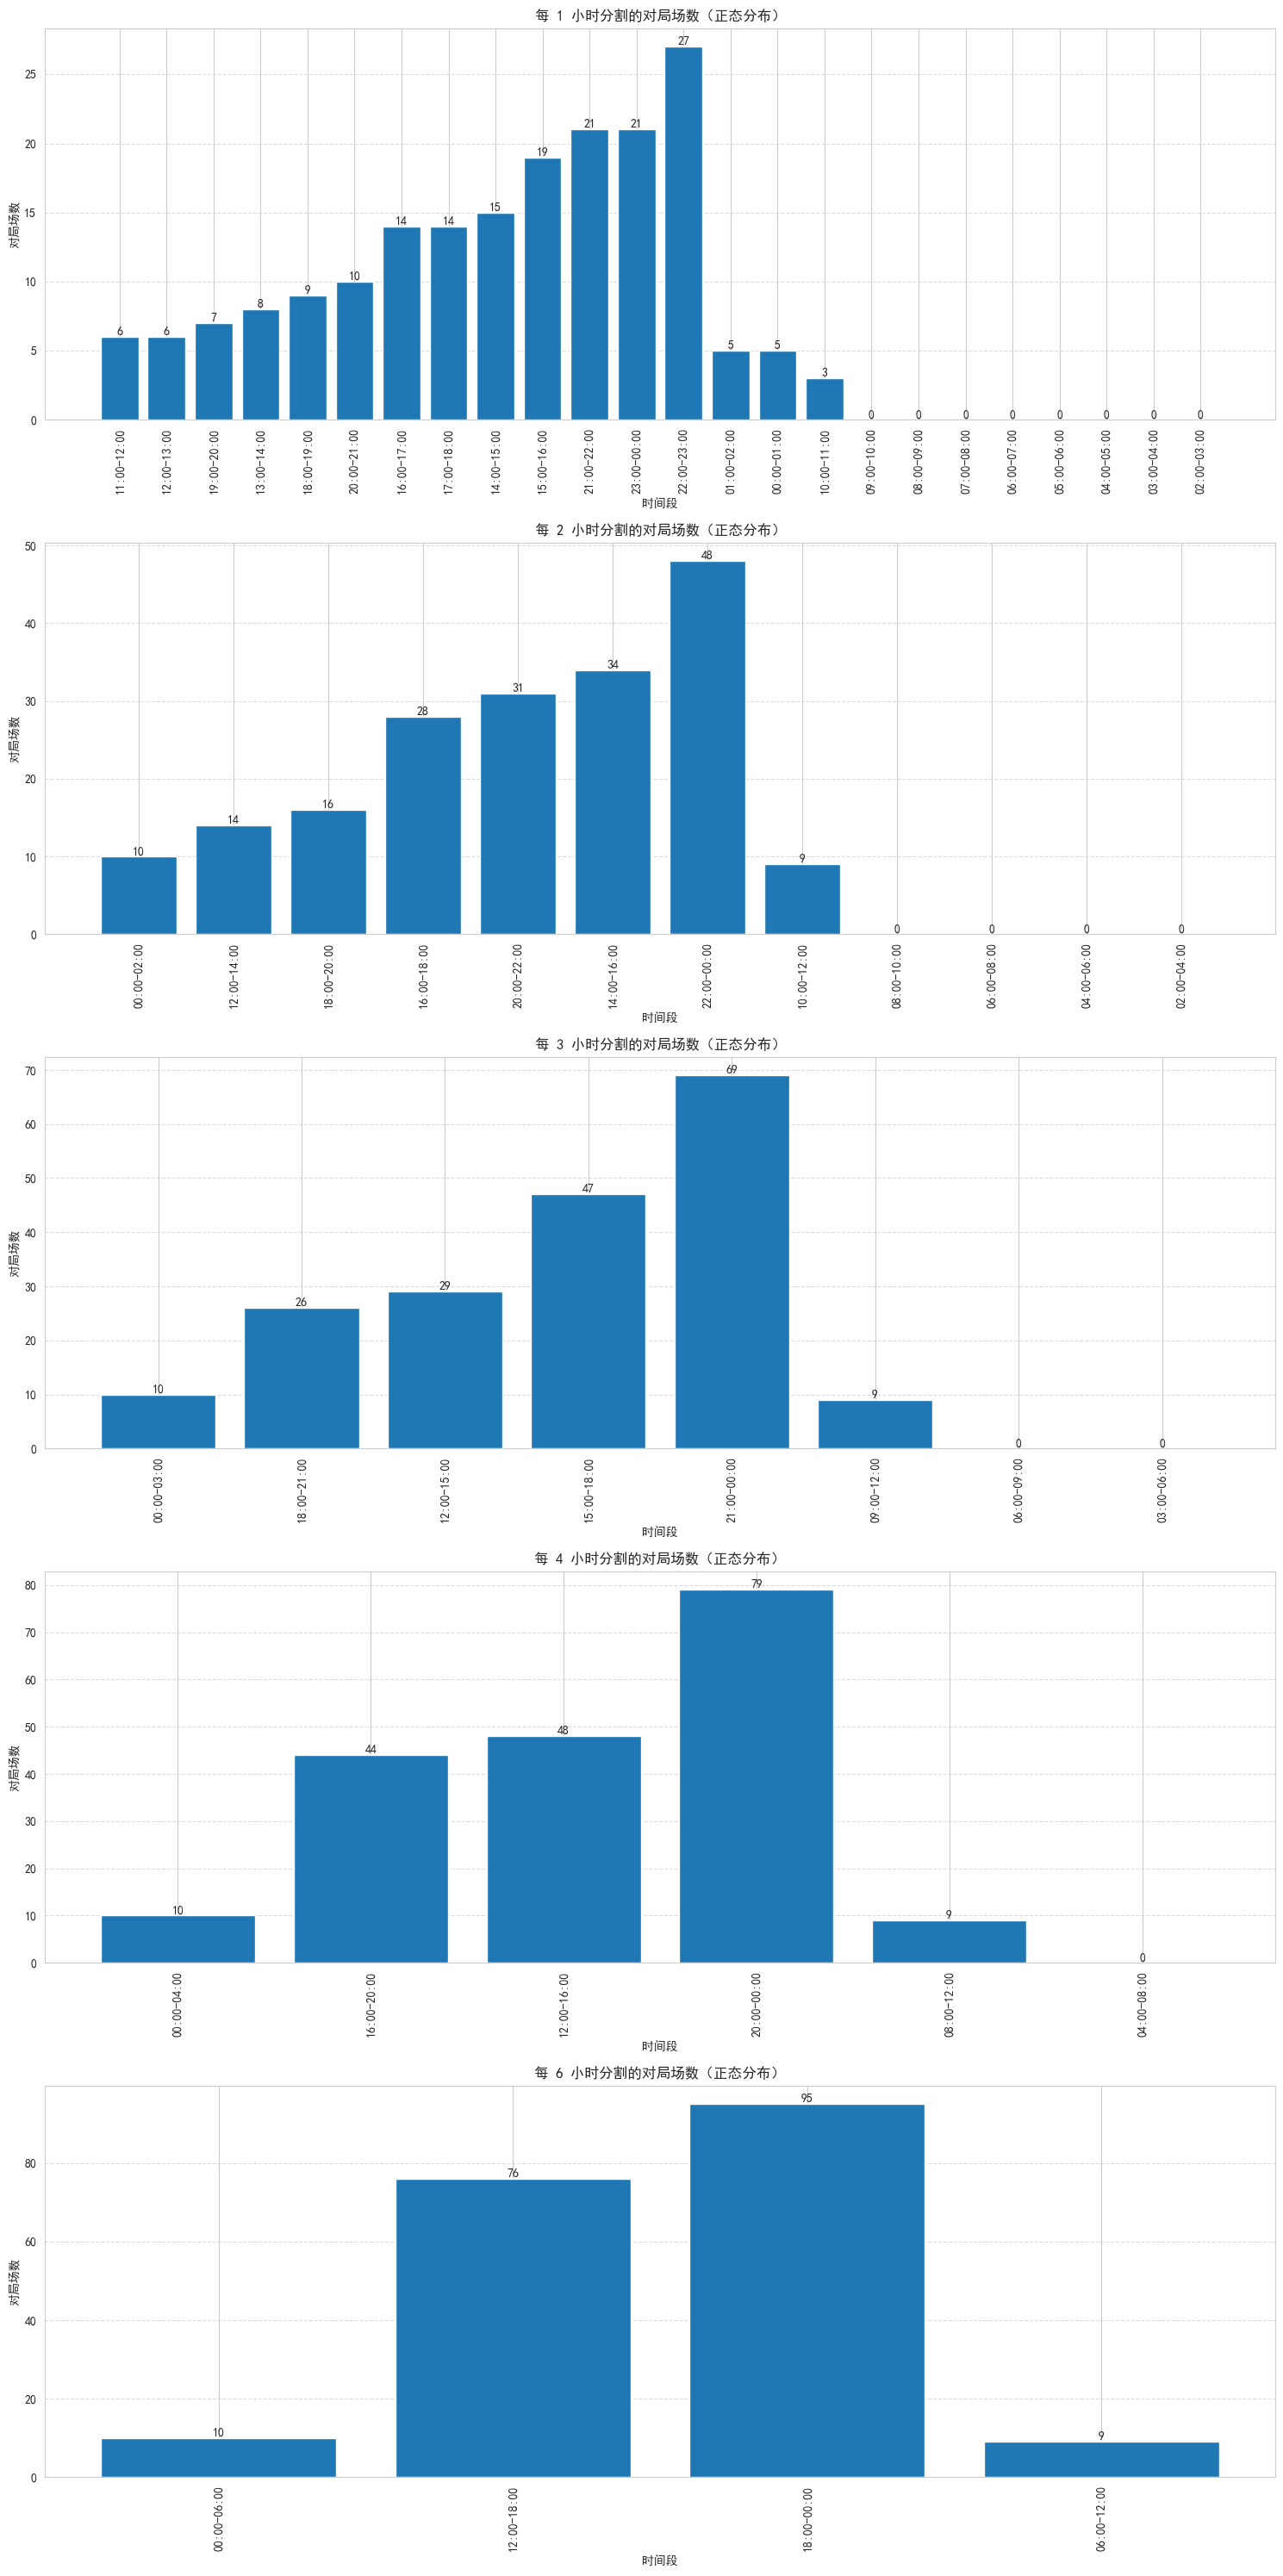

In [48]:
def split_day_into_intervals(interval_hours):
    intervals = []
    for hour in range(0, 24, interval_hours):
        start_time = datetime.strptime(f"{hour:02d}:00", "%H:%M").time()
        end_time = datetime.strptime(f"{(hour + interval_hours) % 24:02d}:00", "%H:%M").time()
        intervals.append((start_time, end_time))
    return intervals

# 统计每个时间段的对局场数（确保所有时段都有值）
def count_games_by_interval(df, interval_hours):
    intervals = split_day_into_intervals(interval_hours)
    game_counts = []
    labels = []
    for start, end in intervals:
        if start < end:
            mask = (df['gametime'].dt.time >= start) & (df['gametime'].dt.time < end)
        else:
            # 处理跨天的情况（例如 23:00-1:00）
            mask = (df['gametime'].dt.time >= start) | (df['gametime'].dt.time < end)
        count = len(df[mask])  # 统计对局场数
        game_counts.append(count)
        labels.append(f"{start.strftime('%H:%M')}-{end.strftime('%H:%M')}")
    return game_counts, labels

# 根据对局场数正态分布重新排列时间段和场数
def rearrange_intervals(game_counts, labels, interval_hours):
    # 创建包含对局场数和标签的元组列表
    interval_data = list(zip(game_counts, labels))
    # 按对局场数从大到小排序
    interval_data.sort(reverse=True)
    # 提取排序后的对局场数和标签
    sorted_game_counts, sorted_labels = zip(*interval_data)
    
    # 计算中间位置
    n = len(sorted_game_counts)
    mid_index = n // 2
    
    # 重新排列时间间隔，使得最高的在中间，依次向两边排列
    if n % 2 == 0:
        # 偶数个元素
        new_labels = list(sorted_labels[mid_index::-1]) + list(sorted_labels[mid_index+1:])
        new_game_counts = list(sorted_game_counts[mid_index::-1]) + list(sorted_game_counts[mid_index+1:])
    else:
        # 奇数个元素
        new_labels = list(sorted_labels[mid_index::-1]) + list(sorted_labels[mid_index:])
        new_game_counts = list(sorted_game_counts[mid_index::-1]) + list(sorted_game_counts[mid_index:])
    
    return new_game_counts, new_labels

# 假设 df 已经存在，确保 gametime 是 datetime 类型
if 'gametime' in df.columns:
    df['gametime'] = pd.to_datetime(df['gametime'])

# 定义需要分割的时段
interval_list = [1, 2, 3, 4, 6]

# 绘制每个时段的柱状图
plt.figure(figsize=(15, 30))
for i, interval_hours in enumerate(interval_list):
    game_counts, labels = count_games_by_interval(df, interval_hours)
    # 重新排列时间段和场数
    new_game_counts, new_labels = rearrange_intervals(game_counts, labels, interval_hours)
    plt.subplot(len(interval_list), 1, i + 1)
    x = np.arange(len(new_labels))  # 设置 x 轴为数值轴
    bars = plt.bar(x, new_game_counts)  # 绘制柱状图
    
    # 在每个柱形顶部添加对局场数的数值标签
    for bar, count in zip(bars, new_game_counts):
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, height, f'{count}', 
                 ha='center', va='bottom', fontsize=10)
    
    plt.title(f"每 {interval_hours} 小时分割的对局场数（正态分布）")
    plt.xlabel("时间段")
    plt.ylabel("对局场数")
    plt.xticks(x, new_labels, rotation=90)  # 将 x 轴刻度与标签对齐，垂直显示标签
    plt.grid(axis='y', linestyle='--', alpha=0.7)  # 添加网格线
plt.tight_layout()  # 自动调整子图布局
plt.show()

In [49]:
total_used_time = df['usedTime'].sum()/60/60  # 总时长（小时）
print(f"本赛季对局总时长: {total_used_time} 小时")

本赛季对局总时长: 48.638333333333335 小时


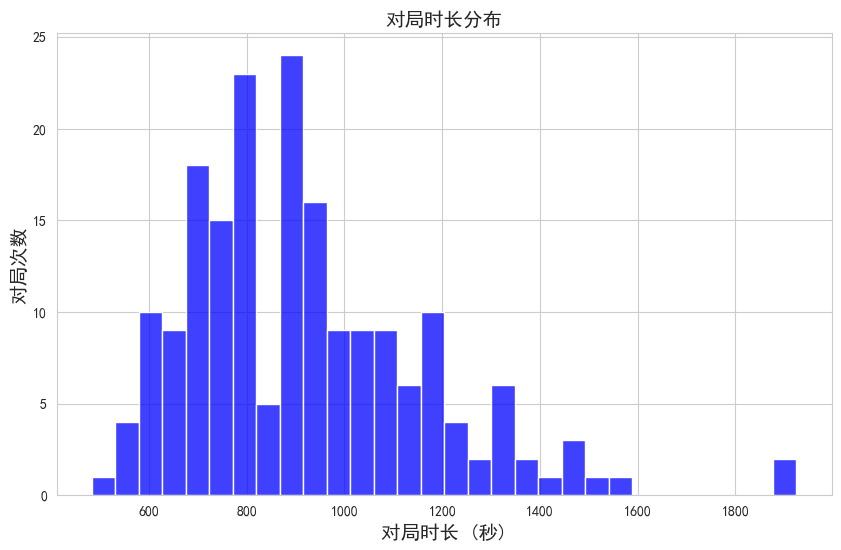

In [50]:
# 设置图形大小
plt.figure(figsize=(10, 6))

# 绘制柱形图
sns.histplot(df['usedTime'], bins=30, kde=False, color='blue')

# 设置标题和标签
plt.title('对局时长分布', fontproperties=font)
plt.xlabel('对局时长 (秒)', fontproperties=font)
plt.ylabel('对局次数', fontproperties=font)

# 显示图形
plt.show()

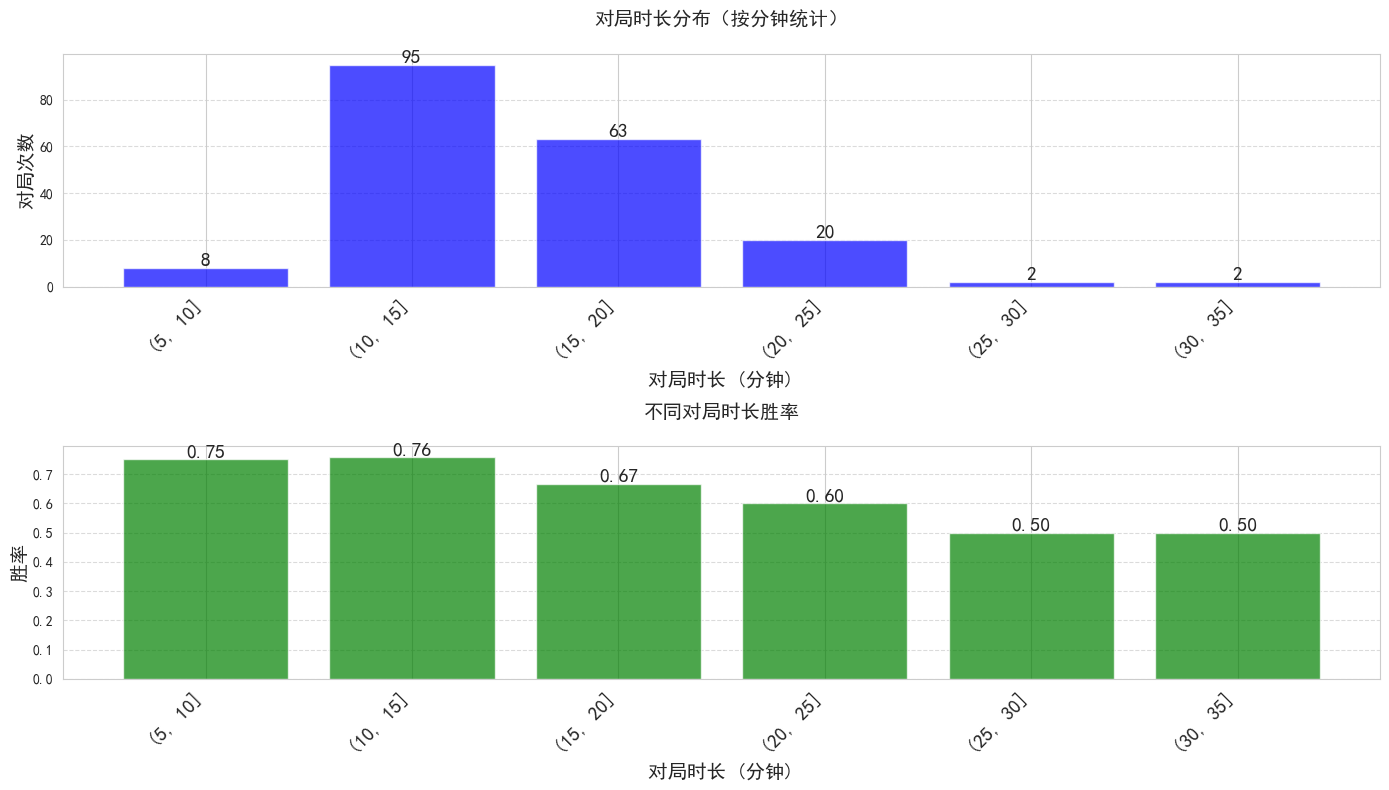

In [51]:
# 确保usedTime列是数值类型
df['usedTime'] = pd.to_numeric(df['usedTime'], errors='coerce')

# 去除缺失值
df = df.dropna(subset=['usedTime'])

# 将usedTime转换为分钟数
df['usedTime_min'] = df['usedTime'] / 60

# 计算胜率（gameresult为1表示胜利）
df['win'] = df['gameresult'].apply(lambda x: 1 if x == 1 else 0)

# 定义分钟间隔
bins = range(0, int(df['usedTime_min'].max()) + 5, 5)

# 分桶统计对局数量和胜率
df['time_bin'] = pd.cut(df['usedTime_min'], bins=bins)
time_stats = df.groupby('time_bin', observed=False).agg(
    total_games=('usedTime_min', 'size'),
    win_rate=('win', 'mean')
).reset_index()

# 去除空桶
time_stats = time_stats.dropna()

# 设置图形大小
plt.figure(figsize=(14, 8))

# 绘制对局时长分布柱形图
plt.subplot(2, 1, 1)
bars = plt.bar(time_stats['time_bin'].astype(str), time_stats['total_games'], color='blue', alpha=0.7)
plt.title('对局时长分布（按分钟统计）', fontproperties=font, pad=20)
plt.xlabel('对局时长 (分钟)', fontproperties=font)
plt.ylabel('对局次数', fontproperties=font)
plt.xticks(rotation=45, ha='right', fontproperties=font)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# 在柱形图上标注数值
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, int(height), ha='center', va='bottom', fontproperties=font)

# 绘制胜率柱形图
plt.subplot(2, 1, 2)
bars = plt.bar(time_stats['time_bin'].astype(str), time_stats['win_rate'], color='green', alpha=0.7)
plt.title('不同对局时长胜率', fontproperties=font, pad=20)
plt.xlabel('对局时长 (分钟)', fontproperties=font)
plt.ylabel('胜率', fontproperties=font)
plt.xticks(rotation=45, ha='right', fontproperties=font)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# 在柱形图上标注数值
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}', ha='center', va='bottom', fontproperties=font)

# 调整布局
plt.tight_layout()

# 显示图形
plt.show()

In [52]:

# 查找最长和最短的对局时间
max_used_time = df['usedTime'].max() / 60  # 转换为分钟
min_used_time = df['usedTime'].min() / 60  # 转换为分钟

# 查找最长和最短对局对应的gametime和对局结果
max_gametime = pd.to_datetime(df.loc[df['usedTime'].idxmax(), 'gametime']).strftime('%Y-%m-%d %H:%M')
max_result = df.loc[df['usedTime'].idxmax(), 'gameresult']
min_gametime = pd.to_datetime(df.loc[df['usedTime'].idxmin(), 'gametime']).strftime('%Y-%m-%d %H:%M')
min_result = df.loc[df['usedTime'].idxmin(), 'gameresult']

# 计算赛季所有对局的平均时长
average_used_time = df['usedTime'].mean() / 60  # 转换为分钟

# 格式化输出
print(f"赛季排位总对局场数: {len(df)}")
print(f"赛季排位对局平均时长: {average_used_time:.1f} 分钟")
print(f"最短对局时间: {min_used_time:.1f} 分钟, 对应gametime: {min_gametime}, 对局结果: {'胜利' if min_result == 1 else '失败'}")
print(f"最长对局时间: {max_used_time:.1f} 分钟, 对应gametime: {max_gametime}, 对局结果: {'胜利' if max_result == 1 else '失败'}")

赛季排位总对局场数: 190
赛季排位对局平均时长: 15.4 分钟
最短对局时间: 8.1 分钟, 对应gametime: 2025-01-07 11:23, 对局结果: 失败
最长对局时间: 32.1 分钟, 对应gametime: 2025-01-24 17:32, 对局结果: 失败


     dtEventTime  gametype  winCamp            gametime  kills  deaths  \
189   1736081420         4        2 2025-01-05 20:33:00      5      14   
188   1736082765         4        2 2025-01-05 20:59:00      4      12   
187   1736158574         4        1 2025-01-06 18:05:00      1       7   
186   1736159445         4        2 2025-01-06 18:19:00      3      10   
185   1736160864         4        2 2025-01-06 18:34:00      7      17   

     assists  gameresult  mvpcnt  losemvp  ...  hero1Kill9Cnt  hero1Kill10Cnt  \
189        4           2       0        0  ...              0               0   
188        0           2       0        1  ...              0               0   
187        7           1       0        0  ...              0               0   
186        5           1       0        0  ...              0               0   
185        8           1       0        0  ...              0               0   

     gradeGame            datetime        date    datetime_shifted  

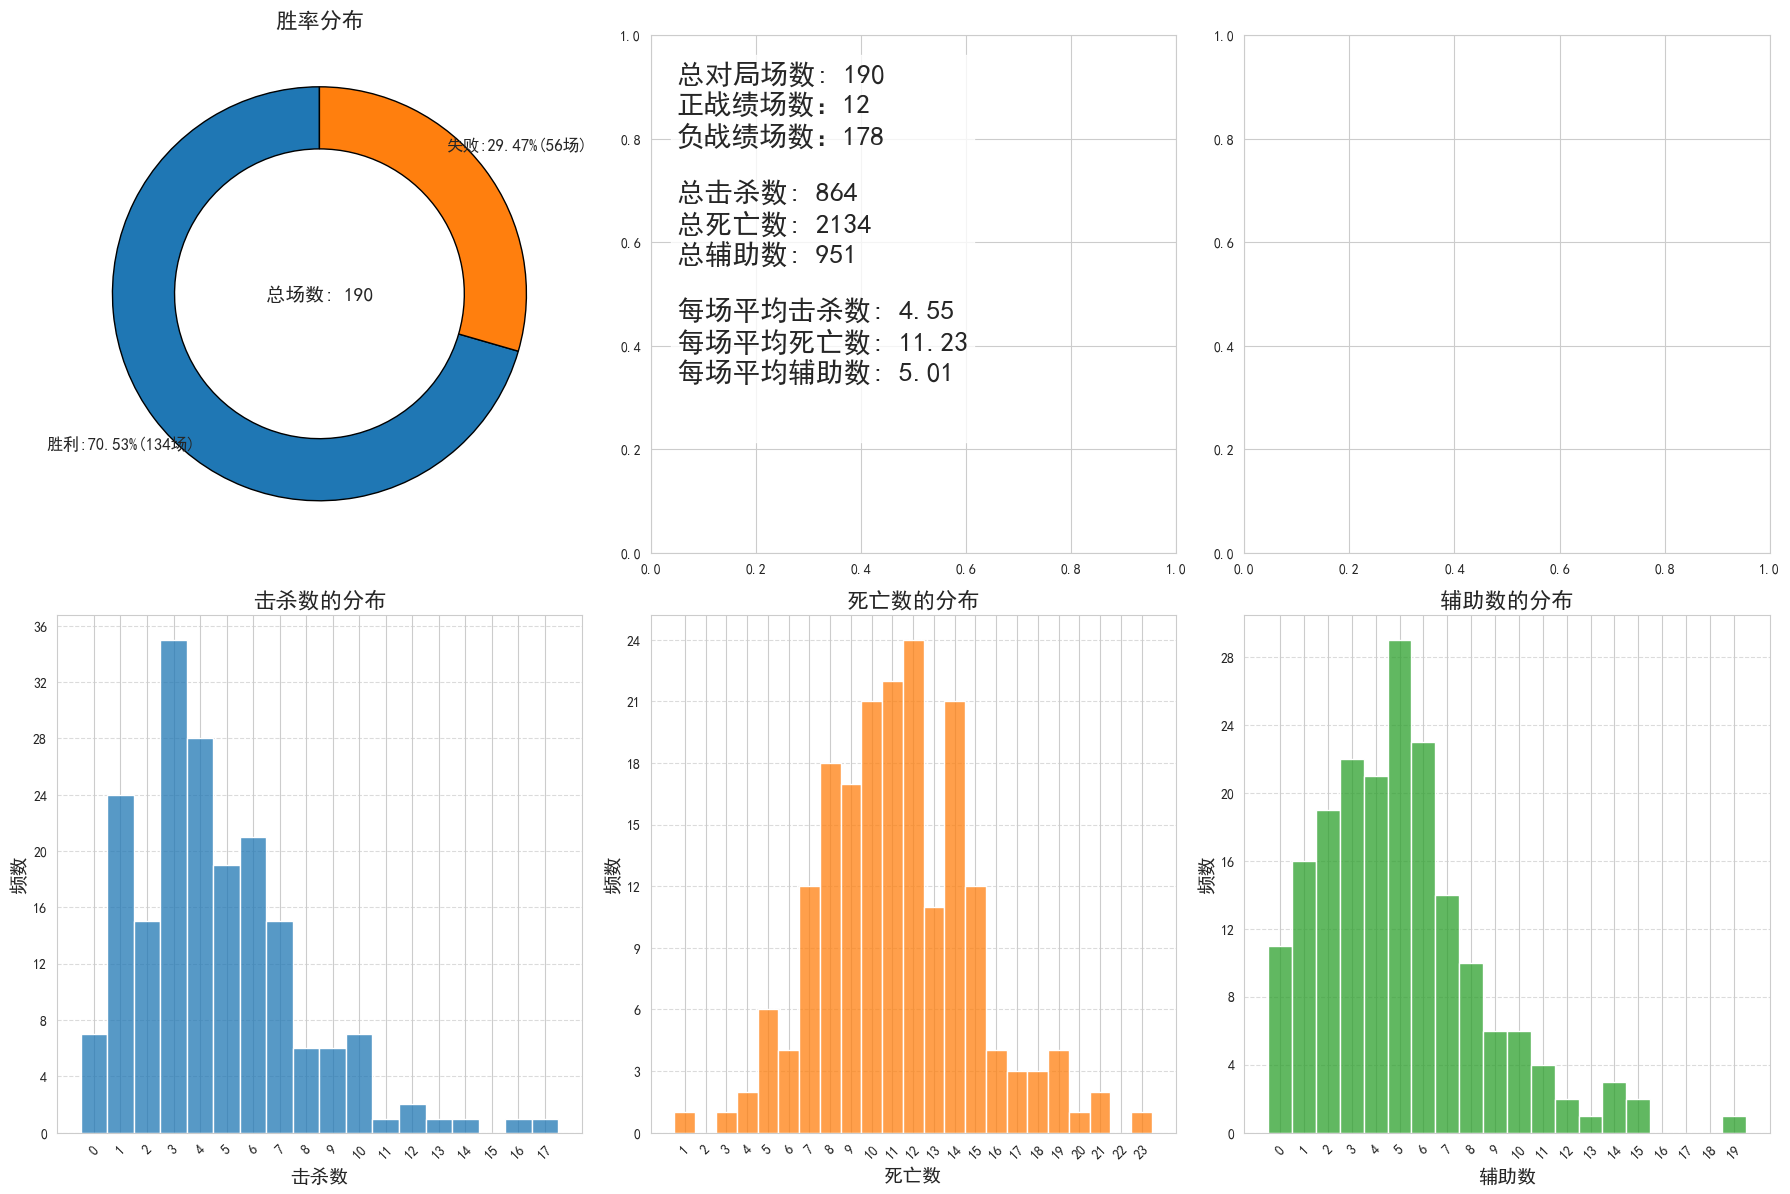

In [53]:

# 数据预处理
df['result'] = df['gameresult'].map({1: '胜利', 2: '失败'})  # 将 gameresult 映射为中文
df.rename(columns={'killcnt': 'kills', 'deadcnt': 'deaths', 'assistcnt': 'assists'}, inplace=True)  # 重命名列

# 输出数据的基本信息
print(df.head())
print(df.info())
print(df.describe())

# 分组输出数量和分别的占比
grouped = df.groupby('result').size().reset_index(name='counts')
grouped['percentage'] = grouped['counts'] / grouped['counts'].sum() * 100
print(grouped)

# 计算总击杀数、死亡数、辅助数
total_kills = df['kills'].sum()
total_deaths = df['deaths'].sum()
total_assists = df['assists'].sum()
print(df[['kills', 'deaths', 'assists']].sum())


# 定义绘制分布图的函数
def plot_distribution(df, column, ax, title, color):
    min_val = df[column].min()
    max_val = df[column].max()
    print(f'{column}的最小值: {min_val}, 最大值: {max_val}')
    bin_edges = np.arange(min_val - 0.5, max_val + 1.5, 1)
    sns.histplot(df[column], kde=False, ax=ax, color=color, bins=bin_edges)
    ax.set_title(title, fontsize=16)
    ax.set_xlabel(title.split('的')[0], fontsize=14)
    ax.set_ylabel('频数', fontsize=14)
    ax.set_xticks(range(min_val, max_val + 1))
    ax.set_xticklabels([str(x) for x in range(min_val, max_val + 1)], rotation=45)
    ax.yaxis.set_major_locator(MaxNLocator(integer=True))  # 使用 MaxNLocator
    ax.grid(axis='y', linestyle='--', alpha=0.7)


# 绘制分布图
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# 计算胜利与失败的数量
result_counts = df['result'].value_counts()
total_games = result_counts.sum()
win_count = result_counts.get('胜利', 0)
lose_count = result_counts.get('失败', 0)
print(result_counts)
print(f'胜利场数: {win_count}, 失败场数: {lose_count}')

# 绘制饼图
ax = axes[0][0]
wedges, texts, autotexts = ax.pie(result_counts, autopct='', startangle=90,
                                  wedgeprops={'edgecolor': 'black', 'linewidth': 1, 'linestyle': 'solid', 'width': 0.3},
                                  labels=None)
ax.text(0, 0, f'总场数: {total_games}', ha='center', va='center', fontsize=14, fontweight='bold')
ax.set_title("胜率分布", fontsize=16)

# 计算胜率和失败率
win_rate = (win_count / total_games) * 100 if total_games > 0 else 0
lose_rate = (lose_count / total_games) * 100 if total_games > 0 else 0

for i, wedge in enumerate(wedges):
    angle = (wedge.theta1 + wedge.theta2) / 2
    x = 1.2 * np.cos(np.radians(angle))
    y = 1.2 * np.sin(np.radians(angle))
    label = result_counts.index[i]
    count = result_counts.iloc[i]
    if label == '胜利':
        percentage_text = f'胜利:{win_rate:.2f}%({win_count}场)'
    else:
        percentage_text = f'失败:{lose_rate:.2f}%({lose_count}场)'
    ax.annotate(percentage_text, xy=(x, y), ha='center', va='center', fontsize=12, fontweight='bold')

# 计算每把的平均击杀数、死亡数、辅助数
average_kills = df['kills'].mean()
average_deaths = df['deaths'].mean()
average_assists = df['assists'].mean()

# 获取击杀数大于死亡数的场次
kills_greater_than_deaths = len(df[df['kills'] >= df['deaths']])  # 直接比较列
kills_less_than_deaths = len(df[df['kills'] < df['deaths']])

# 将所有信息整合为一个文本块
text_to_display1 = (
    f"总对局场数: {total_games}\n"
    f"正战绩场数：{kills_greater_than_deaths}\n"
    f"负战绩场数：{kills_less_than_deaths}\n\n"
    f"总击杀数: {total_kills}\n"
    f"总死亡数: {total_deaths}\n"
    f"总辅助数: {total_assists}\n\n"
    f"每场平均击杀数: {average_kills:.2f}\n"
    f"每场平均死亡数: {average_deaths:.2f}\n"
    f"每场平均辅助数: {average_assists:.2f}\n\n"
)

# 将整合的文本添加到 axes[0][1] 上
axes[0][1].text(0.05, 0.95, text_to_display1, transform=axes[0][1].transAxes,
                fontsize=20, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.8))

# 绘制分布图
plot_distribution(df, 'kills', axes[1][0], '击杀数的分布', '#1f77b4')
plot_distribution(df, 'deaths', axes[1][1], '死亡数的分布', '#ff7f0e')
plot_distribution(df, 'assists', axes[1][2], '辅助数的分布', '#2ca02c')

plt.tight_layout()
plt.show()

In [54]:
# 读取CSV文件
df_repetition = pd.read_csv('raw.csv', encoding='GBK')

# 提取killcnt最大和最小的对局情况
max_killcnt_row = df_repetition.loc[df_repetition['killcnt'].idxmax()]
min_killcnt_row = df_repetition.loc[df_repetition['killcnt'].idxmin()]

# 提取deadcnt最大和最小的对局情况
max_deadcnt_row = df_repetition.loc[df_repetition['deadcnt'].idxmax()]
min_deadcnt_row = df_repetition.loc[df_repetition['deadcnt'].idxmin()]

# 提取assistcnt最大和最小的对局情况
max_assistcnt_row = df_repetition.loc[df_repetition['assistcnt'].idxmax()]
min_assistcnt_row = df_repetition.loc[df_repetition['assistcnt'].idxmin()]

# 格式化输出
def format_row(row):
    gametime = pd.to_datetime(row['gametime']).strftime('%Y-%m-%d %H:%M')
    result = '胜利' if row['gameresult'] == 1 else '失败'
    used_time_min = row['usedTime'] / 60  # 转换为分钟
    desc = row['desc'] if pd.notna(row['desc']) else '无描述'
    mvp = '是' if row['mvpcnt'] > 0 else '否'
    return (
        f"对局时间: {gametime}\t"
        f"战绩: {row['killcnt']}/{row['deadcnt']}/{row['assistcnt']}\t"
        f"结果： {result}\t"
        f"对局时长: {used_time_min:.1f} 分钟\t"
        f"描述: {desc}\t"
        f"评分: {row['gradeGame']:.1f}\t"
        f"是否获得MVP: {mvp}"
    )

# 输出killcnt最大和最小的对局情况
print(f"击杀数最多的对局情况: {format_row(max_killcnt_row)}\t击杀数: {max_killcnt_row['killcnt']}")
print(f"击杀数最少的对局情况: {format_row(min_killcnt_row)}\t击杀数: {min_killcnt_row['killcnt']}")

# 输出deadcnt最大和最小的对局情况
print(f"死亡数最多的对局情况: {format_row(max_deadcnt_row)}\t死亡数: {max_deadcnt_row['deadcnt']}")
print(f"死亡数最少的对局情况: {format_row(min_deadcnt_row)}\t死亡数: {min_deadcnt_row['deadcnt']}")

# 输出assistcnt最大和最小的对局情况
print(f"助攻数最多的对局情况: {format_row(max_assistcnt_row)}\t助攻数: {max_assistcnt_row['assistcnt']}")
print(f"助攻数最少的对局情况: {format_row(min_assistcnt_row)}\t助攻数: {min_assistcnt_row['assistcnt']}")

击杀数最多的对局情况: 对局时间: 2025-01-09 11:22	战绩: 17/7/3	结果： 胜利	对局时长: 11.9 分钟	描述: 实力局	评分: 11.7	是否获得MVP: 否	击杀数: 17
击杀数最少的对局情况: 对局时间: 2025-02-04 22:26	战绩: 0/9/0	结果： 失败	对局时长: 11.4 分钟	描述: 无描述	评分: 2.9	是否获得MVP: 否	击杀数: 0
死亡数最多的对局情况: 对局时间: 2025-01-24 17:32	战绩: 5/23/11	结果： 失败	对局时长: 32.1 分钟	描述: 无描述	评分: 6.0	是否获得MVP: 否	死亡数: 23
死亡数最少的对局情况: 对局时间: 2025-01-29 22:56	战绩: 3/1/7	结果： 胜利	对局时长: 11.3 分钟	描述: 无描述	评分: 8.7	是否获得MVP: 否	死亡数: 1
助攻数最多的对局情况: 对局时间: 2025-02-02 19:13	战绩: 9/21/19	结果： 胜利	对局时长: 31.9 分钟	描述: 无描述	评分: 7.5	是否获得MVP: 否	助攻数: 19
助攻数最少的对局情况: 对局时间: 2025-02-07 23:13	战绩: 5/10/0	结果： 失败	对局时长: 12.3 分钟	描述: 尽力局	评分: 7.0	是否获得MVP: 否	助攻数: 0


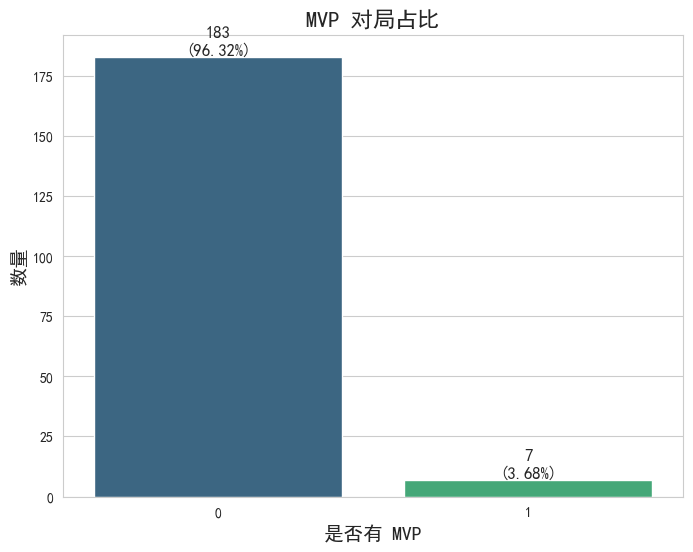

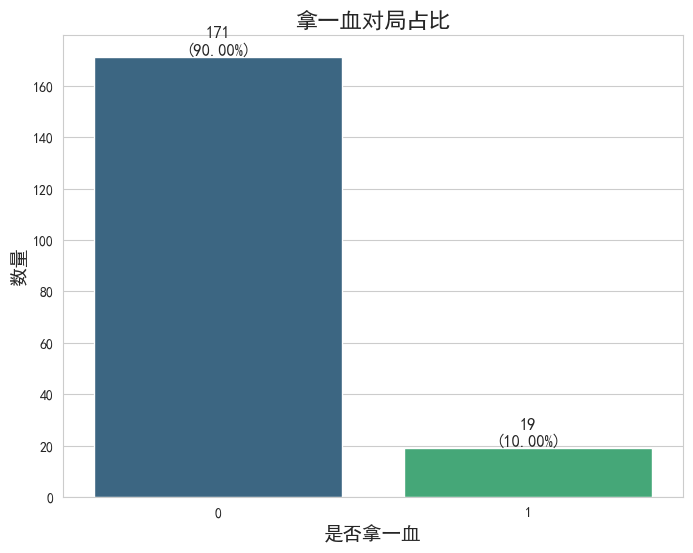

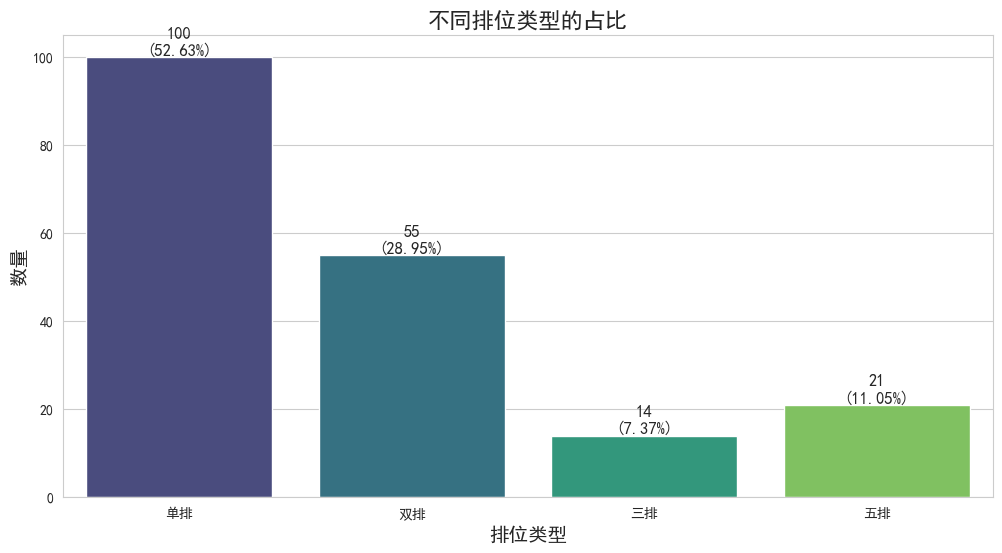

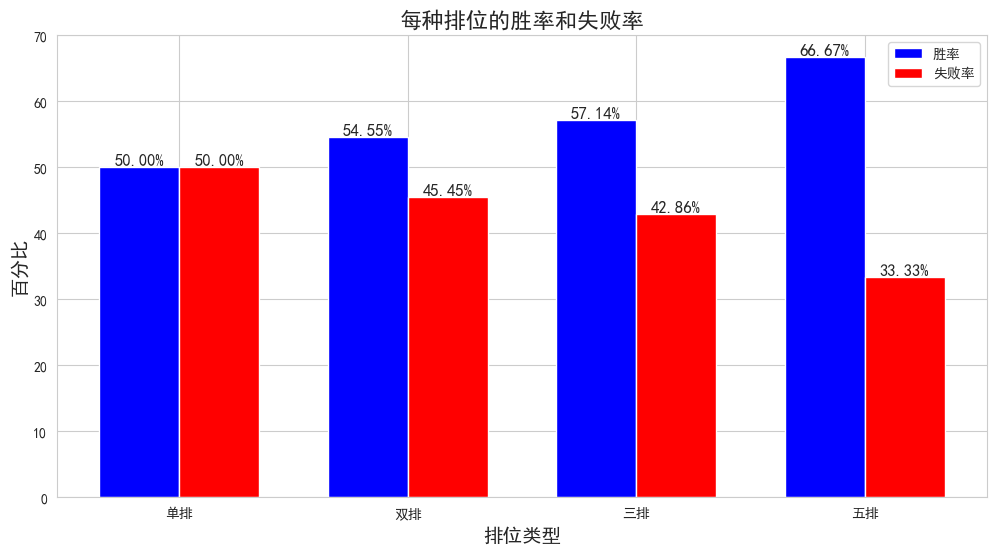

In [55]:
# 统计 mvp 对局的占比
mvp_counts = df_repetition['mvpcnt'].value_counts()
mvp_percentages = mvp_counts / len(df_repetition) * 100

# 创建柱状图
plt.figure(figsize=(8, 6))
sns.barplot(x=mvp_counts.index, y=mvp_counts.values, palette='viridis', hue=mvp_counts.index, legend=False)
plt.title('MVP 对局占比', fontsize=16)
plt.xlabel('是否有 MVP', fontsize=14)
plt.ylabel('数量', fontsize=14)
for i, value in enumerate(mvp_counts.values):
    plt.text(i, value, f'{value}\n({mvp_percentages[i]:.2f}%)', ha='center', va='bottom', fontsize=12)
plt.show()

# 统计拿一血的对局占比
first_blood_counts = df_repetition['firstBlood'].value_counts()
first_blood_percentages = first_blood_counts / len(df_repetition) * 100

# 创建柱状图
plt.figure(figsize=(8, 6))
sns.barplot(x=first_blood_counts.index, y=first_blood_counts.values, palette='viridis', hue=first_blood_counts.index, legend=False)
plt.title('拿一血对局占比', fontsize=16)
plt.xlabel('是否拿一血', fontsize=14)
plt.ylabel('数量', fontsize=14)
for i, value in enumerate(first_blood_counts.values):
    plt.text(i, value, f'{value}\n({first_blood_percentages[i]:.2f}%)', ha='center', va='bottom', fontsize=12)
plt.show()

# 提取 mapName 中的排位类型
df_repetition['mapType'] = df_repetition['mapName'].str.extract(r'(单排|双排|三排|五排)')
df_repetition['mapType'] = df_repetition['mapType'].fillna('单排')  # 将排位赛默认为单排

# 定义正确的排位顺序
map_type_order = ['单排', '双排', '三排', '五排']

# 按照指定的顺序排序数据类型
df_repetition['mapType'] = pd.Categorical(df_repetition['mapType'], categories=map_type_order, ordered=True)

# 计算各排位类型的占比和胜率
map_type_counts = df_repetition['mapType'].value_counts().sort_index()
map_type_win_rates = df_repetition.groupby('mapType', observed=False)['winCamp'].apply(lambda x: (x == 1).mean() * 100).sort_index()
map_type_lose_rates = 100 - map_type_win_rates

# 创建第一个子图：不同排位类型的占比
plt.figure(figsize=(12, 6))
sns.barplot(x=map_type_counts.index, y=map_type_counts.values, palette='viridis', hue=map_type_counts.index, legend=False)
plt.title('不同排位类型的占比', fontsize=16)
plt.xlabel('排位类型', fontsize=14)
plt.ylabel('数量', fontsize=14)
for i, value in enumerate(map_type_counts.values):
    plt.text(i, value, f'{value}\n({(value / len(df_repetition)) * 100:.2f}%)', ha='center', va='bottom', fontsize=12)
plt.show()

# 创建第二个子图：每种排位的胜率和失败率
plt.figure(figsize=(12, 6))
bar_width = 0.35
index = np.arange(len(map_type_win_rates))
bars1 = plt.bar(index, map_type_win_rates, bar_width, label='胜率', color='b')
bars2 = plt.bar(index + bar_width, map_type_lose_rates, bar_width, label='失败率', color='r')
plt.title('每种排位的胜率和失败率', fontsize=16)
plt.xlabel('排位类型', fontsize=14)
plt.ylabel('百分比', fontsize=14)
plt.xticks(index + bar_width / 2, map_type_win_rates.index)
plt.legend(loc='upper right')  # 在右上角显示图例
for i, (win_rate, lose_rate) in enumerate(zip(map_type_win_rates, map_type_lose_rates)):
    plt.text(i, win_rate, f'{win_rate:.2f}%', ha='center', va='bottom', fontsize=12)
    plt.text(i + bar_width, lose_rate, f'{lose_rate:.2f}%', ha='center', va='bottom', fontsize=12)
plt.show()

最高评分: 12.1
最低评分: 2.9
中位数: 6.5
众数: 5.8
平均评分: 6.810526315789475


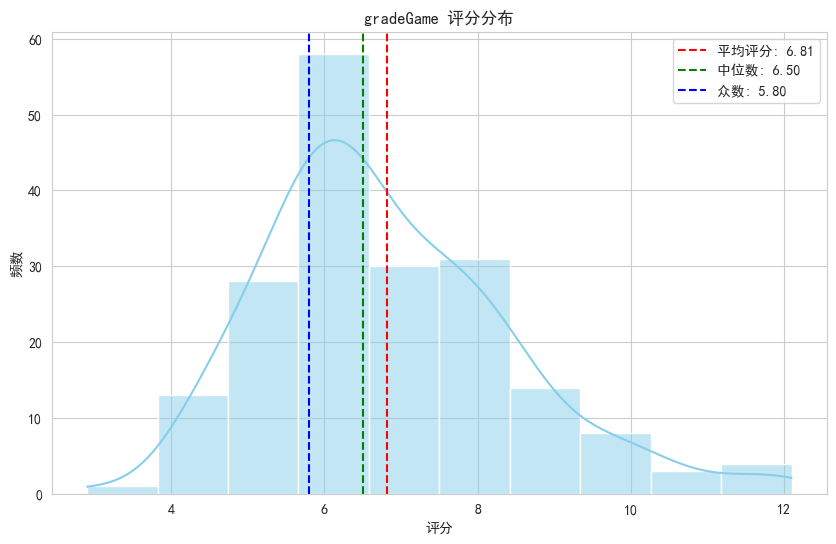

In [56]:
# 提取 gradeGame 列
grade_game = df_repetition['gradeGame']

# 计算统计指标
max_score = grade_game.max()
min_score = grade_game.min()
median_score = grade_game.median()
mode_score = grade_game.mode()[0]  # 众数可能有多个，取第一个
mean_score = grade_game.mean()

# 打印统计指标
print(f"最高评分: {max_score}")
print(f"最低评分: {min_score}")
print(f"中位数: {median_score}")
print(f"众数: {mode_score}")
print(f"平均评分: {mean_score}")

# 可视化评分分布
plt.figure(figsize=(10, 6))
sns.histplot(grade_game, kde=True, bins=10, color='skyblue')
plt.title('gradeGame 评分分布')
plt.xlabel('评分')
plt.ylabel('频数')
plt.axvline(mean_score, color='red', linestyle='--', label=f'平均评分: {mean_score:.2f}')
plt.axvline(median_score, color='green', linestyle='--', label=f'中位数: {median_score:.2f}')
plt.axvline(mode_score, color='blue', linestyle='--', label=f'众数: {mode_score:.2f}')
plt.legend()
plt.show()

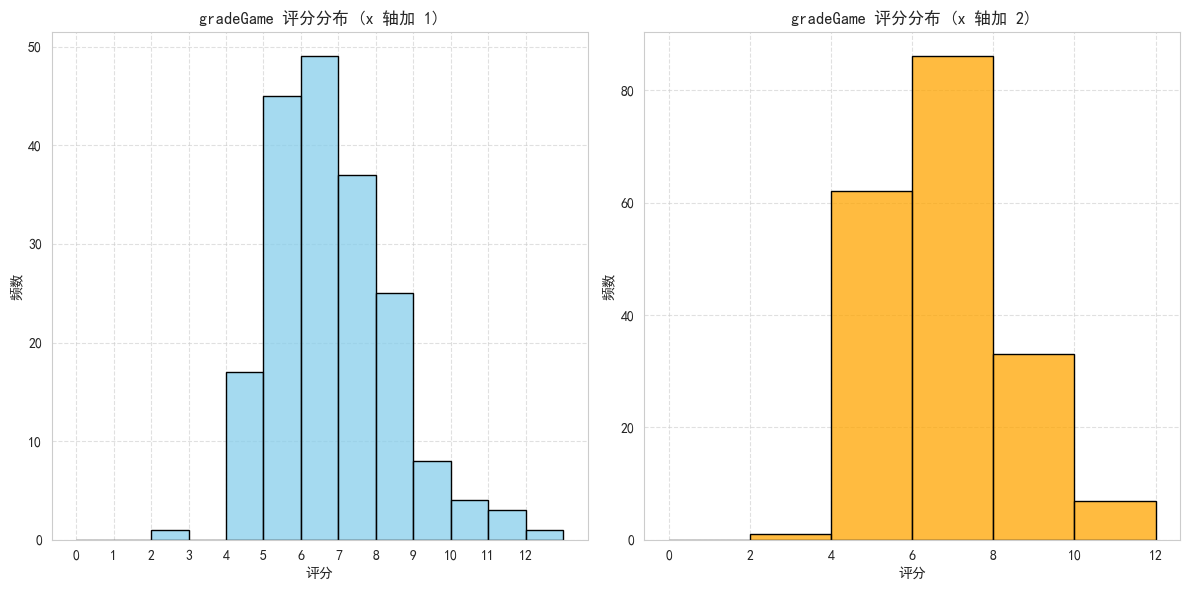

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 读取数据
df_repetition = pd.read_csv('raw.csv', encoding='GBK')

# 提取 gradeGame 列
grade_game = df_repetition['gradeGame']

# 绘制 x 轴逐渐加 1 的图
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)  # 创建第一个子图
sns.histplot(grade_game, kde=False, bins=np.arange(0, int(grade_game.max()) + 2, 1), color='skyblue', edgecolor='black')  # bins 与 X 轴刻度对齐
plt.title('gradeGame 评分分布 (x 轴加 1)')
plt.xlabel('评分')
plt.ylabel('频数')
plt.xticks(np.arange(0, int(grade_game.max()) + 1, 1))  # x 轴刻度从 0 开始，间隔为 1
plt.grid(True, linestyle='--', alpha=0.6)

# 绘制 x 轴逐渐加 2 的图
plt.subplot(1, 2, 2)  # 创建第二个子图
sns.histplot(grade_game, kde=False, bins=np.arange(0, int(grade_game.max()) + 2, 2), color='orange', edgecolor='black')  # bins 与 X 轴刻度对齐
plt.title('gradeGame 评分分布 (x 轴加 2)')
plt.xlabel('评分')
plt.ylabel('频数')
plt.xticks(np.arange(0, int(grade_game.max()) + 1, 2))  # x 轴刻度从 0 开始，间隔为 2
plt.grid(True, linestyle='--', alpha=0.6)

# 调整子图间距
plt.tight_layout()
plt.show()